In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [2]:
# Import the game
import gym_super_mario_bros

# Import the joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# We will use a subset of possible actions
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [4]:
# Setup game
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [5]:
env.action_space

Discrete(7)

In [6]:
env.observation_space.shape

(240, 256, 3)

In [7]:
env.observation_space.sample()

array([[[ 12, 101, 180],
        [  5,   2, 184],
        [130,  83,   0],
        ...,
        [181,  22,  69],
        [154, 133, 156],
        [114,  90, 104]],

       [[ 39,  66,  73],
        [220, 103, 129],
        [149,   1, 216],
        ...,
        [215, 210, 108],
        [ 54, 227, 166],
        [185,  71, 118]],

       [[ 38, 144, 180],
        [ 58, 227,  86],
        [171,  61,  78],
        ...,
        [120, 225, 152],
        [226,  83,   0],
        [237,   1, 218]],

       ...,

       [[181,  85,  15],
        [ 33, 240,  50],
        [251,  94, 249],
        ...,
        [ 50, 120, 130],
        [182, 196, 236],
        [  9, 191,  55]],

       [[ 15,  77, 244],
        [181, 235, 223],
        [ 63,  97,  42],
        ...,
        [ 21,  53,  20],
        [225, 128, 130],
        [210, 172, 213]],

       [[ 85, 222,  58],
        [221,  26, 187],
        [215, 102, 198],
        ...,
        [255,  33, 120],
        [ 70, 160, 187],
        [ 85,  77, 145]]

In [8]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A']

In [17]:
# Is game done
done = True

for step in range(100000):
    if done:
        # Start the game
        env.reset()
    # Do random action
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game
    env.render()
# Close the game
env.close()

2022-03-08 19:40:58.817 python[68971:2492528] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb64de9c500>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-08 19:40:58.817 python[68971:2492528] Warning: Expected min height of view: (<NSButton: 0x7fb64debe7a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-08 19:40:58.819 python[68971:2492528] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb64debf400>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-08 19:40:58.820 python[68971:2492528] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb61d7079e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-08 19:41:00.093 pyt

KeyboardInterrupt: 

In [11]:
conda install pytorch torchvision torchaudio -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /Users/roberthvestbo/opt/anaconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytorch-1.10.2             |          py3.9_0        97.8 MB  pytorch
    torchaudio-0.10.2          |         py39_cpu         4.0 MB  pytorch
    torchvision-0.11.3         |         py39_cpu         7.0 MB  pytorch
    ------------------------------------------------------------
                                           Total:       108.9 MB

The following NEW packages will be INSTALLED:

  pytorch            pytorch/osx-64::pytorch-1.10.2-py3.9_0
  torchaudio         pytorch/osx-64::torchaudio-0.10.2-py39_cpu
  torchvision        pytorch/osx-64::torchvision-0.11.3-py39_cpu



torchvision-0.11.3   | 7.0 MB    | ##################################### | 100% 


In [18]:
!pip install 'stable-baselines3[extra]'

In [26]:
# Import frame stack and grayscaling wrapper
from gym.wrappers import FrameStack, GrayScaleObservation

# Import vectorization wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib to show the impact of stack framing
from matplotlib import pyplot as plt

In [40]:
# Create the base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# Stack the frames
env = VecFrameStack(env, 4, channels_order="last")

In [54]:
state = env.reset()

In [55]:
state.shape

(1, 240, 256, 4)

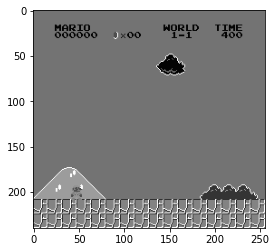

In [56]:
# use Matplotlib to show the game frame
plt.imshow(state[0])

In [57]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [58]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [59]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [60]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [61]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [62]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_3
----------------------------
| time/              |     |
|    fps             | 87  |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 2             |
|    time_elapsed         | 122           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.6688213e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.0011       |
|    learning_rate        | 1e-06         |
|    loss                 | 193           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000255     |
|    value_loss           | 382           |
-------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 13            |
|    time_elapsed         | 1389          |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 1.4498481e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0114        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.135         |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000254     |
|    value_loss           | 0.216         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 14           |
|    time_elapsed         | 1502    

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 24            |
|    time_elapsed         | 2644          |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 3.9016944e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0071        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.137         |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000601     |
|    value_loss           | 0.463         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 25            |
|    time_elapsed         | 2761

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 35            |
|    time_elapsed         | 3912          |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 4.0053972e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0444        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0888        |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000124     |
|    value_loss           | 0.962         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 36            |
|    time_elapsed         | 4025

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 46            |
|    time_elapsed         | 5174          |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 1.4651567e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.0261       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0995        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000169     |
|    value_loss           | 0.158         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 47            |
|    time_elapsed         | 5289

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 57            |
|    time_elapsed         | 6443          |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 1.2070406e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0928        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.112         |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.000108     |
|    value_loss           | 0.306         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 58           |
|    time_elapsed         | 6557    

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 68            |
|    time_elapsed         | 7695          |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 2.7488684e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.114         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.142         |
|    n_updates            | 670           |
|    policy_gradient_loss | -0.000153     |
|    value_loss           | 0.472         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 69            |
|    time_elapsed         | 7808

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 79            |
|    time_elapsed         | 8946          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 5.9382757e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | -0.000219     |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0768        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000444     |
|    value_loss           | 0.116         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 80            |
|    time_elapsed         | 9058

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 90            |
|    time_elapsed         | 10191         |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 1.9651023e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.0253       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0401        |
|    n_updates            | 890           |
|    policy_gradient_loss | -8.71e-05     |
|    value_loss           | 0.134         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 91            |
|    time_elapsed         | 1030

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 101           |
|    time_elapsed         | 11437         |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 2.6786816e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.00205       |
|    learning_rate        | 1e-06         |
|    loss                 | 22.2          |
|    n_updates            | 1000          |
|    policy_gradient_loss | -0.000248     |
|    value_loss           | 40.2          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 102         |
|    time_elapsed         | 11550       

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 112          |
|    time_elapsed         | 12676        |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0012584405 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.178        |
|    learning_rate        | 1e-06        |
|    loss                 | 140          |
|    n_updates            | 1110         |
|    policy_gradient_loss | 0.00343      |
|    value_loss           | 478          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 4          |
|    iterations           | 113        |
|    time_elapsed         | 12789      |
|    total_timesteps 

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 123           |
|    time_elapsed         | 13913         |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 0.00021235435 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.544         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0574        |
|    n_updates            | 1220          |
|    policy_gradient_loss | -0.00108      |
|    value_loss           | 0.276         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 124           |
|    time_elapsed         | 1402

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 134           |
|    time_elapsed         | 15151         |
|    total_timesteps      | 68608         |
| train/                  |               |
|    approx_kl            | 0.00011977984 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.00907      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.057         |
|    n_updates            | 1330          |
|    policy_gradient_loss | -0.000324     |
|    value_loss           | 0.321         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 135           |
|    time_elapsed         | 1526

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 145           |
|    time_elapsed         | 16389         |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 0.00024622213 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.84         |
|    explained_variance   | -0.0184       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.161         |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000156     |
|    value_loss           | 1.84          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 146           |
|    time_elapsed         | 1650

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 156          |
|    time_elapsed         | 17623        |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0001391304 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | 0.0155       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0457       |
|    n_updates            | 1550         |
|    policy_gradient_loss | -0.000462    |
|    value_loss           | 0.106        |
------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 4              |
|    iterations           | 157            |
|    time_elapsed         | 17736          |
|

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 167          |
|    time_elapsed         | 18859        |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 0.0001944704 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.84        |
|    explained_variance   | -0.0164      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0483       |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00101     |
|    value_loss           | 0.162        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 168           |
|    time_elapsed         | 18972         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 178           |
|    time_elapsed         | 20100         |
|    total_timesteps      | 91136         |
| train/                  |               |
|    approx_kl            | 0.00011544558 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | -0.00571      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.144         |
|    n_updates            | 1770          |
|    policy_gradient_loss | -0.000557     |
|    value_loss           | 0.506         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 179           |
|    time_elapsed         | 2021

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 189           |
|    time_elapsed         | 21339         |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 0.00028810685 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.0103       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0542        |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.00123      |
|    value_loss           | 0.561         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 190           |
|    time_elapsed         | 2145

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 200           |
|    time_elapsed         | 22570         |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00027435273 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | 0.00638       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0463        |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.00106      |
|    value_loss           | 0.127         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 201           |
|    time_elapsed         | 2268

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 211          |
|    time_elapsed         | 23808        |
|    total_timesteps      | 108032       |
| train/                  |              |
|    approx_kl            | 8.997077e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.8         |
|    explained_variance   | -0.0178      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0368       |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.000223    |
|    value_loss           | 0.137        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 212           |
|    time_elapsed         | 23920         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 222          |
|    time_elapsed         | 25050        |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 6.335077e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | -0.0203      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.172        |
|    n_updates            | 2210         |
|    policy_gradient_loss | 0.00035      |
|    value_loss           | 0.545        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 223           |
|    time_elapsed         | 25162         |
|    t

--------------------------------------------
| time/                   |                |
|    fps                  | 4              |
|    iterations           | 233            |
|    time_elapsed         | 26286          |
|    total_timesteps      | 119296         |
| train/                  |                |
|    approx_kl            | 0.000111745205 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.82          |
|    explained_variance   | 0.0358         |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0496         |
|    n_updates            | 2320           |
|    policy_gradient_loss | -0.000283      |
|    value_loss           | 0.199          |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 234          |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 244           |
|    time_elapsed         | 27522         |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 0.00019134185 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | 0.0308        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0497        |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.00104      |
|    value_loss           | 0.132         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 245           |
|    time_elapsed         | 2763

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 255           |
|    time_elapsed         | 28757         |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 0.00020499737 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79         |
|    explained_variance   | -0.0425       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0716        |
|    n_updates            | 2540          |
|    policy_gradient_loss | -0.00085      |
|    value_loss           | 0.426         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 256           |
|    time_elapsed         | 2886

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 266          |
|    time_elapsed         | 29989        |
|    total_timesteps      | 136192       |
| train/                  |              |
|    approx_kl            | 0.0045272545 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | 0.481        |
|    learning_rate        | 1e-06        |
|    loss                 | 119          |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00474     |
|    value_loss           | 356          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 267           |
|    time_elapsed         | 30101         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 277           |
|    time_elapsed         | 31225         |
|    total_timesteps      | 141824        |
| train/                  |               |
|    approx_kl            | 0.00014348014 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0127       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0533        |
|    n_updates            | 2760          |
|    policy_gradient_loss | -0.000667     |
|    value_loss           | 0.115         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 278         |
|    time_elapsed         | 31340       

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 288           |
|    time_elapsed         | 32458         |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 0.00022263778 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.034        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.11          |
|    n_updates            | 2870          |
|    policy_gradient_loss | -0.000578     |
|    value_loss           | 0.4           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 289           |
|    time_elapsed         | 3257

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 299           |
|    time_elapsed         | 33716         |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00012310594 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0384       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0751        |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.000154     |
|    value_loss           | 0.426         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 300           |
|    time_elapsed         | 3383

KeyboardInterrupt: 

In [ ]:
model.save('thisisatestmodel')

In [73]:
# Load model
model = PPO.load('./train/best_model_10000')

In [74]:
state = env.reset()

In [75]:
# Start the game 
state = env.reset()
# Loop through the game
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 